# Лабораторная работа по модулю “Математика и статистика в Python”

In [80]:
import pandas as pd
import numpy as np
import statistics
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import stats 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import researchpy as rp
import requests

1. Загрузить файл auto.csv

In [81]:
df = pd.read_csv('auto.csv', sep=',') 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

In [34]:
# df.hist(figsize=(20,20), bins = 100)
# plt.show()

2. Рассчитать основные статистики для переменных(среднее,медиана, мода, мин/макс, сред. отклонение)

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# мода
df.mode(axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# для engine-size распределение - двухмодальное:
df['engine-size'].value_counts().head()

122    15
92     15
98     14
97     14
108    13
Name: engine-size, dtype: int64

In [21]:
# мода для всех переменных (ещё раз, чтобы увидеть все значения)
print('Значение моды для переменных:')
print('  symboling:', statistics.mode(df['symboling']))
print('  normalized-losses:', statistics.mode(df['normalized-losses']))
print('  make:', statistics.mode(df['make']))
print('  fuel-type:', statistics.mode(df['fuel-type']))
print('  aspiration:', statistics.mode(df['aspiration']))
print('  num-of-doors:', statistics.mode(df['num-of-doors']))
print('  body-style:', statistics.mode(df['body-style']))
print('  drive-wheels:', statistics.mode(df['drive-wheels']))
print('  engine-location:', statistics.mode(df['engine-location']))
print('  wheel-base:', statistics.mode(df['wheel-base']))
print('  length:', statistics.mode(df['length']))
print('  width:', statistics.mode(df['width']))
print('  height:', statistics.mode(df['height']))
print('  curb-weight:', statistics.mode(df['curb-weight']))
print('  engine-type:', statistics.mode(df['engine-type']))
print('  num-of-cylinders:', statistics.mode(df['num-of-cylinders']))
print('  fuel-system:', statistics.mode(df['fuel-system']))
print('  bore:', statistics.mode(df['bore']))
print('  stroke:', statistics.mode(df['stroke']))
print('  compression-ratio:', statistics.mode(df['compression-ratio']))
print('  horsepower:', statistics.mode(df['horsepower']))
print('  peak-rpm:', statistics.mode(df['peak-rpm']))
print('  city-mpg:', statistics.mode(df['city-mpg']))
print('  highway-mpg:', statistics.mode(df['highway-mpg']))
print('  price:', statistics.mode(df['price']))

Значение моды для переменных:
  symboling: 0
  normalized-losses: 161
  make: toyota
  fuel-type: gas
  aspiration: std
  num-of-doors: four
  body-style: sedan
  drive-wheels: fwd
  engine-location: front
  wheel-base: 94.5
  length: 157.3
  width: 63.8
  height: 50.8
  curb-weight: 2385
  engine-type: ohc
  num-of-cylinders: four
  fuel-system: mpfi
  bore: 3.62
  stroke: 3.4
  compression-ratio: 9.0
  horsepower: 68
  peak-rpm: 5500
  city-mpg: 31
  highway-mpg: 25
  price: 6785


In [22]:
# print('  engine-size:', statistics.mode(df['engine-size']))

3. Рассчитать и визуализировать корреляционную матрицу для переменных

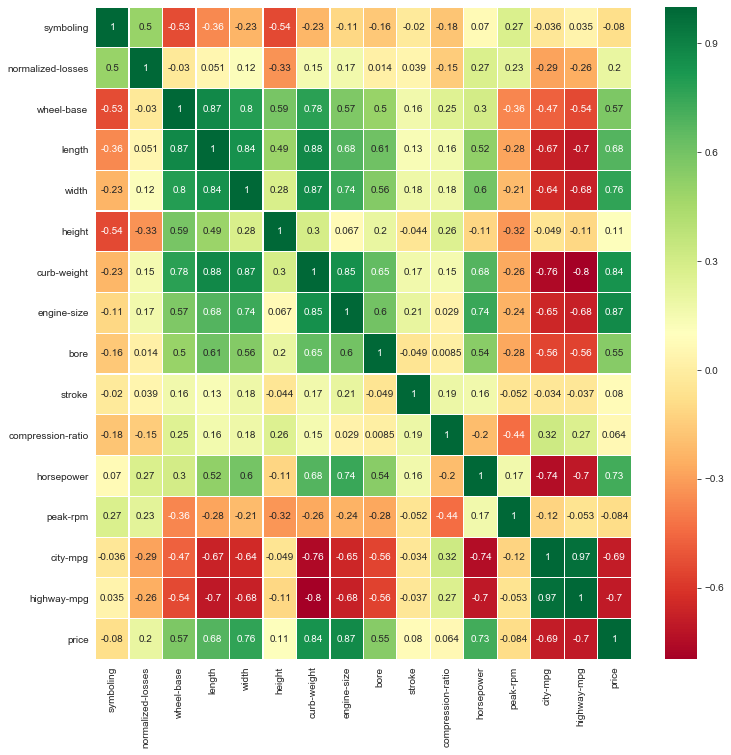

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

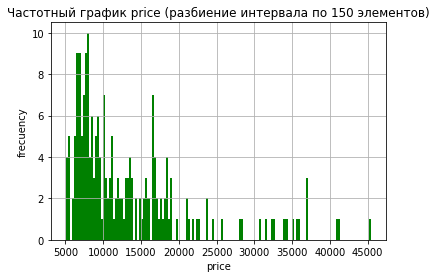

In [13]:
# plt.hist - строит частотный график выборки, разбивая значения выборки на равные интервалы
n, bins, patches = plt.hist(df['price'], 150, facecolor='g')

plt.xlabel('price')
plt.ylabel('frecuency')
plt.title('Частотный график price (разбиение интервала по 150 элементов)')
plt.grid(True)
plt.show()

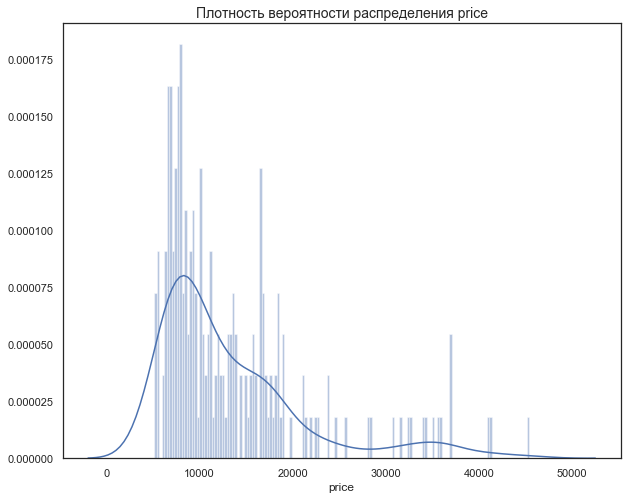

In [37]:
# sns.set(rc={'figure.figsize':(12,8)})
plt.figure(figsize=(10,8))
price = df['price']
sns.distplot(price, 150)
# sns.distplot(sample, kde=False, bins=100)
plt.title('Плотность вероятности распределения price', fontsize=14)
# plt.legend(['price'])
plt.show()

In [36]:
# рассчитать показатели skewness и kurtosis
print('Коэффициент асимметрии:', "%.2f" % stats.skew(price))
print('Коэффициент эксцесса:', "%.2f" % stats.kurtosis(price))

Коэффициент асимметрии: 1.75
Коэффициент эксцесса: 2.85


5. Визуализировать несколько взаимосвязей между переменными

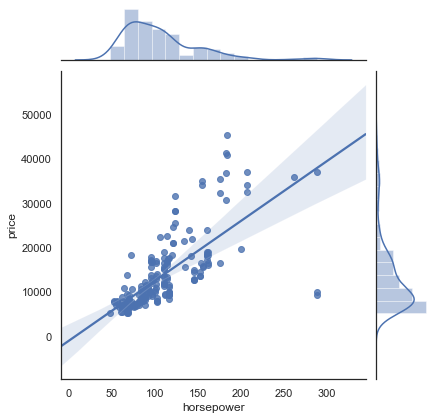

In [30]:
# для визуализации выбраны переменные с высокими значениями коэффициента корреляции
# взаимосвязь между переменными horsepower и price
horsepower = df['horsepower']
price = df['price']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=horsepower, y=price, data=df, kind='reg')
plt.show()

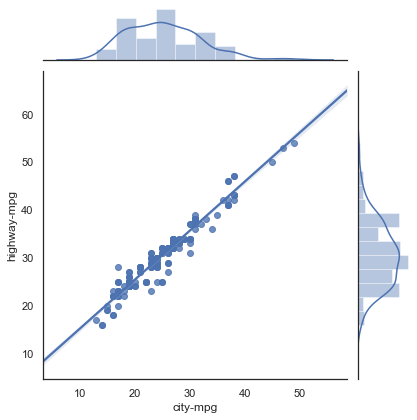

In [15]:
# взаимосвязь между переменными city-mpg и highway-mpg
city_mpg = df['city-mpg']
highway_mpg = df['highway-mpg']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=city_mpg, y=highway_mpg, data=df, kind='reg')
plt.show()

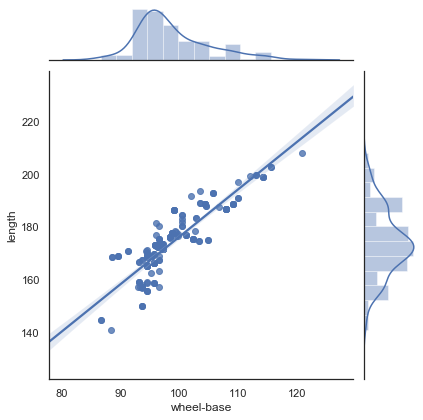

In [18]:
# взаимосвязь между переменными wheel-base и length
wheel_base = df['wheel-base']
length = df['length']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=wheel_base, y=length, data=df, kind='reg')
plt.show()

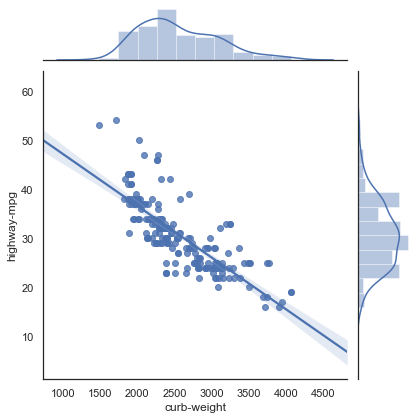

In [19]:
# взаимосвязь между переменными curb-weight и highway-mpg
curb_weight = df['curb-weight']
highway_mpg = df['highway-mpg']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=curb_weight, y=highway_mpg, data=df, kind='reg')
plt.show()

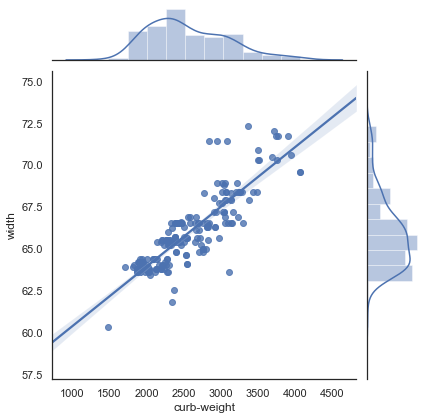

In [21]:
# взаимосвязь между переменными curb-weight и width
curb_weight = df['curb-weight']
width = df['width']
sns.set(style="white", color_codes=True)
g = sns.jointplot(x=curb_weight, y=width, data=df, kind='reg')
plt.show()

6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test

In [38]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [74]:
# Тестируем гипотезу, что автомобили toyota имеют больший расход топлива в загородном цикле, чем nissan
toyota = df[df['make']=='toyota']['highway-mpg']
nissan = df[df['make']=='nissan']['highway-mpg']
descriptives, results = rp.ttest(toyota, nissan)
print(descriptives)
print('_______________________________________')
print(results)

      Variable     N       Mean        SD        SE  95% Conf.   Interval
0  highway-mpg  32.0  32.906250  5.549539  0.981029  30.905428  34.907072
1  highway-mpg  18.0  32.944444  7.549618  1.779462  29.190108  36.698781
2     combined  50.0  32.920000  6.265682  0.886101  31.139313  34.700687
_______________________________________
                          Independent t-test  results
0  Difference (highway-mpg - highway-mpg) =   -0.0382
1                      Degrees of freedom =   48.0000
2                                       t =   -0.0205
3                   Two side test p value =    0.9837
4                  Difference < 0 p value =    0.4919
5                  Difference > 0 p value =    0.5081
6                               Cohen's d =   -0.0060
7                               Hedge's g =   -0.0059
8                           Glass's delta =   -0.0069
9                                       r =    0.0030


In [ ]:
# значение показателя p-value (0.98) > 0.05, гипотеза неверна

In [76]:
# Тестируем гипотезу, что автомобили hatchback не отличаются по цене от автомобилей sedan
hatchback = df[df['body-style']=='hatchback']['price']
sedan = df[df['body-style']=='sedan']['price']
descriptives, results = rp.ttest(hatchback, sedan)
print(descriptives)
print('_______________________________________')
print(results)

   Variable      N          Mean           SD          SE     95% Conf.  \
0     price   70.0  10542.985714  5458.392258  652.402659   9241.478022   
1     price   96.0  14299.864583  8504.701494  868.007461  12576.651899   
2  combined  166.0  12715.638554  7587.270735  588.886417  11552.914342   

       Interval  
0  11844.493407  
1  16023.077267  
2  13878.362767  
_______________________________________
              Independent t-test    results
0  Difference (price - price) =  -3756.8789
1          Degrees of freedom =    164.0000
2                           t =     -3.2398
3       Two side test p value =      0.0014
4      Difference < 0 p value =      0.0007
5      Difference > 0 p value =      0.9993
6                   Cohen's d =     -0.5092
7                   Hedge's g =     -0.5069
8               Glass's delta =     -0.6883
9                           r =      0.2453


In [ ]:
# значение показателя p-value (0.0014) < 0.05, гипотеза верна

In [78]:
# Тестируем гипотезу, что автомобили с дизельным двигателем не экономичнее в городском цикле, чем с бензиновым двигателем
diesel = df[df['fuel-type']=='diesel']['city-mpg']
gas = df[df['fuel-type']=='gas']['city-mpg']
descriptives, results = rp.ttest(diesel, gas)
print(descriptives)
print('_______________________________________')
print(results)

   Variable      N       Mean        SD        SE  95% Conf.   Interval
0  city-mpg   20.0  30.300000  6.610199  1.478086  27.206331  33.393669
1  city-mpg  185.0  24.670270  6.311173  0.464007  23.754813  25.585728
2  combined  205.0  25.219512  6.542142  0.456923  24.318615  26.120409
_______________________________________
                    Independent t-test   results
0  Difference (city-mpg - city-mpg) =     5.6297
1                Degrees of freedom =   203.0000
2                                 t =     3.7726
3             Two side test p value =     0.0002
4            Difference < 0 p value =     0.9999
5            Difference > 0 p value =     0.0001
6                         Cohen's d =     0.8880
7                         Hedge's g =     0.8847
8                     Glass's delta =     0.8517
9                                 r =     0.2560


In [ ]:
# значение показателя p-value (0.0002) < 0.05, гипотеза верна

7. Загрузить результат (в формате .ipynb ноутбука) в
репозиторий. Разместить ссылку на репозиторий в лк на сайте.